# Aggregation of Blind Mode predictions

## Set up

In [1]:
# Set up to use local modules
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..')) # Add parent directory to path
sys.path.insert(0, module_path)

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

# Local imports
from src import process
from src import plot

In [3]:
# Load data
data, ests = process.load_and_process_results()

In [4]:
# The entire data set, including predictions and demographics
data.head()

,Whichmodeareyouplayingin,ForecastingExperience,Superforecaster,LessWrong,@1.WillVladimirPutinbePresidentofRussia,@2.WillUkrainecontrolthecityofSevastopol,@3.WillUkrainecontrolthecityofLuhansk,@4.WillUkrainecontrolthecityofZaporizhzhia,@5.WilltherebealastingceasefireintheRussiaUkrainewar,@6.WilltheKerchBridgebedestroyedsuchthatnovehiclecanpassoverit,...,Wouldyouquotwireheadquotifyouhadtheoption,Howmuchdoyoutrustthemainstreammedia,Ifyouanswered1or2mostlydistrustonthequestionabovewhichoftheseeve,OptionalWasthereanyotherspecificarticleoreventthatseriouslyunder,Howgoodasenseofdirectionorientationandnavigationdoyouhave,Howmuchdoflashingorchangingelementsdetractfromyourenjoymentofweb,Howmanybrowsertabsdoyouhaveopenrightnow,Howmanyunreademailsareinyourinboxrightnow,SupposeItoldyouthatyourfirstguessabouthowthedistancebetweenParis,Ifyouaposvetriedpsychotherapyforanyissuehowwelldiditwork
0,Blind Mode (recommended),No,No,No,99.0,1.0,1.0,1.0,99.0,1.0,...,1.0,1.0,"COVID (later support for vaccines, masks, lock...",None,1.0,I notice these and they annoy me a little,10 - 50,1651,2000.0,5.0
1,Blind Mode (recommended),No,No,No,99.0,1.0,50.0,50.0,85.0,15.0,...,2.0,1.0,"COVID (later support for vaccines, masks, lock...",all of the above plus a constant blizzard of o...,4.0,I notice them and they annoy me so much that I...,More than 50,0,1850.0,NaN
2,Blind Mode (recommended),No,No,No,99.0,1.0,50.0,33.0,1.0,20.0,...,1.0,4.0,None,None,2.0,I notice these and they annoy me a little,2-5,1,8000.0,NaN
3,Blind Mode (recommended),No,No,No,99.0,1.0,1.0,1.0,50.0,10.0,...,1.0,1.0,Attempt to link Trump to Russia,Effective cancelling of Simon Bridges,4.0,I notice them and they annoy me quite a bit,10 - 50,2,3000.0,NaN
4,Blind Mode (recommended),No,No,No,99.0,30.0,30.0,75.0,40.0,80.0,...,4.0,4.0,None,None,4.0,I notice them and they annoy me quite a bit,5 - 10,0,2000.0,NaN


In [5]:
# Just the predictions extracted from data
ests.head()

,@1.WillVladimirPutinbePresidentofRussia,@2.WillUkrainecontrolthecityofSevastopol,@3.WillUkrainecontrolthecityofLuhansk,@4.WillUkrainecontrolthecityofZaporizhzhia,@5.WilltherebealastingceasefireintheRussiaUkrainewar,@6.WilltheKerchBridgebedestroyedsuchthatnovehiclecanpassoverit,@7.WillanissueinvolvinganuclearpowerplantinUkrainerequireevacuat,@8.Willanuclearweaponbedetonatedincludingtestsandaccidents,@9.Willanuclearweaponbeusedinwarienotatestoraccidentandkillatlea,@10.WillChinalaunchafullscaleinvasionofTaiwan,...,@41.WillanimagemodelwinScottAlexander’sbetoncompositionalitytoEd,@42.WillCOVIDkillatleast50asmanypeoplein2023asitdidin2022,@43.WillanewversionofCOVIDbesubstantiallyabletoescapeOmicronvacc,@44.WillGoogleMetaAmazonorApplereleaseanARheadset,@45.WillanordinarypersonbeabletotakeaselfdrivingtaxifromOaklandS,@46.WillaculturedmeatproductbeavailableinatleastoneUSstoreorrest,@47.Willasuccessfuldeepfakeattemptcausingrealdamagemakethefrontp,@48.WillWHOdeclareanewGlobalHealthEmergency,@49.WillAIwinaprogrammingcompetition,@50.WillsomeonereleasequotDALLEbutforvideosquot
0,99.0,1.0,1.0,1.0,99.0,1.0,1.0,1.0,1.0,1.0,...,50.0,1.0,99.0,99.0,1.0,1.0,1.0,1.0,99.0,99.0
1,99.0,1.0,50.0,50.0,85.0,15.0,30.0,15.0,15.0,2.0,...,98.0,2.0,97.0,50.0,50.0,50.0,4.0,15.0,45.0,55.0
2,99.0,1.0,50.0,33.0,1.0,20.0,1.0,1.0,1.0,1.0,...,60.0,25.0,25.0,25.0,5.0,1.0,10.0,3.0,5.0,10.0
3,99.0,1.0,1.0,1.0,50.0,10.0,25.0,1.0,1.0,5.0,...,50.0,99.0,99.0,1.0,1.0,10.0,1.0,90.0,15.0,1.0
4,99.0,30.0,30.0,75.0,40.0,80.0,40.0,10.0,10.0,20.0,...,90.0,30.0,40.0,60.0,70.0,60.0,70.0,20.0,90.0,70.0


## Beta transformed artithmetic mean

[Hanea et al., 2021](<https://doi.org/10.1371/journal.pone.0256919>) compared methods for aggregating predictions and found that the beta transformed artithmetic mean was best. The [beta distribution](<https://en.wikipedia.org/wiki/Beta_distribution>) takes two parameters, $\alpha$ and $\beta$, and is defined on the interval $[0,1]$. The beta distribution is symmetric when $\alpha = \beta$ and is skewed when $\alpha \neq \beta$. They found that $\alpha = \beta = 1 / 7 $ was best.

Quotes from the paper

- "The beta-transformed arithmetic mean (BetaArMean) outperformed most of the other aggregations on all data sets."
- "BetaArMean takes the average of best estimates and transforms it using the cumulative distribution function of a beta distribution, effectively extremising the aggregate"


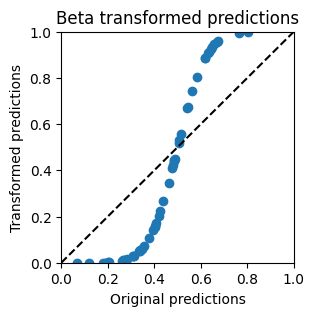

In [6]:
# Beta transformed arithmetic mean of predictions
original_predictions = ests.mean() / 100
fig = plot.beta_transform(original_predictions, a=1 / 7, b=1 / 7)
plt.show()

The plot above is the result of taking the simple mean of all participants and using $\alpha = \beta = 1 / 7 $.

The extremisation from using $\alpha = \beta = 1 / 7 $ seems too extreme. In this case, for example, a prediction with a mean of 25% would be mapped to ~1%.

Averaging over all participants equally is throwing away potentially useful information. Each participant self-identified as belonging to different groups. We can use this information to weight the predictions.

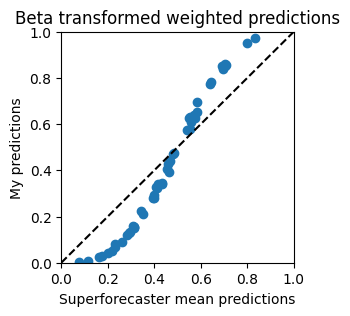

In [7]:
# Weight and then beta transform all predictions

# Calculate the mean predictions, weighted by predictor identification
# Weights are: [none, SF, FE, LW]
weights = [0.05, 0.8, 0.1, 0.05]

ests_none = ests
ests_FE = ests.loc[data["ForecastingExperience"].values == "Yes"]
ests_SF = ests.loc[data["Superforecaster"].values == "Yes"]
ests_LW = ests.loc[data["LessWrong"].values == "Yes"]

weighted_sum = (
    weights[0] * ests_none.mean(axis=0)
    + weights[1] * ests_SF.mean(axis=0)
    + weights[2] * ests_FE.mean(axis=0)
    + weights[3] * ests_LW.mean(axis=0)
)

# Apply the beta transformation to the weighted mean predictions
beta_a = 1 / 3
beta_b = beta_a
weighted_tranformed_mean = beta.ppf(weighted_sum / 100, beta_a, beta_b)

# Save my predictions in proper format
my_preds = pd.DataFrame(np.round(weighted_tranformed_mean * 100))
my_preds[my_preds > 99] = 99
my_preds[my_preds < 1] = 1
my_preds.columns = ["my_predictions"]
my_preds.astype(int)

# Plot my predictions relative to the mean of the superforecasters
fig, ax = plt.subplots(figsize=(3, 3))
ax.axline((0, 0), slope=1, linestyle="dashed", color="black")
plt.scatter(ests_SF.mean() / 100, weighted_tranformed_mean)
plt.title("Beta transformed weighted predictions")
plt.xlabel("Superforecaster mean predictions")
plt.ylabel("My predictions")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.show()

In [8]:
# Example question mean values from Superforecasters
ests_SF = ests.loc[data["Superforecaster"].values == "Yes"]
ests_SF.mean().head()

@1.WillVladimirPutinbePresidentofRussia                 83.345455
@2.WillUkrainecontrolthecityofSevastopol                23.109091
@3.WillUkrainecontrolthecityofLuhansk                   34.145455
@4.WillUkrainecontrolthecityofZaporizhzhia              70.277778
@5.WilltherebealastingceasefireintheRussiaUkrainewar    41.200000
dtype: float64

In [9]:
# My predictions
my_preds.astype(int).head()

,my_predictions
0,97
1,8
2,22
3,86
4,32


In [10]:
save_to_csv = False
if save_to_csv:
    mean_ests_SF = ests_SF.mean()
    mean_ests_SF.columns = ["sf_mean_predictions"]
    my_preds.to_csv("my_final_predictions.csv", index=False)
    mean_ests_SF.to_csv("sf_mean_predictions.csv", index=False)
else:
    print("Did not save predictions")

Did not save predictions
